<a href="https://colab.research.google.com/github/akshatraj1199/Bharat-intern/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bharat Intern/titanic3.csv')

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
df.shape

(1310, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [9]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [10]:
def missing_values_check(df):
  percent_missing = df.isnull().sum()*100/len(df)
  missing_values_df = pd.DataFrame({'column name' : df.columns,
                                    'percent_missing': percent_missing })
  return missing_values_df.sort_values('percent_missing',ascending = False)

In [11]:
missing_values_check(df)

,column name,percent_missing
body,body,90.763359
cabin,cabin,77.480916
boat,boat,62.900763
home.dest,home.dest,43.129771
age,age,20.152672
embarked,embarked,0.229008
fare,fare,0.152672
pclass,pclass,0.076336
survived,survived,0.076336
name,name,0.076336


In [12]:
df_copy = df.copy()

In [13]:
survived_null = df[df['survived'].isnull()]

In [14]:
df['survived'].isnull().sum()

1

In [15]:
missing_values_check(survived_null)

,column name,percent_missing
pclass,pclass,100.0
survived,survived,100.0
name,name,100.0
sex,sex,100.0
age,age,100.0
sibsp,sibsp,100.0
parch,parch,100.0
ticket,ticket,100.0
fare,fare,100.0
cabin,cabin,100.0


In [16]:
df.drop(df[df['survived'].isnull()].index , inplace = True)

In [17]:
missing_values_check(df)

,column name,percent_missing
body,body,90.756303
cabin,cabin,77.463713
boat,boat,62.872422
home.dest,home.dest,43.086325
age,age,20.091673
embarked,embarked,0.152788
fare,fare,0.076394
pclass,pclass,0.000000
survived,survived,0.000000
name,name,0.000000


In [18]:
df.drop(['cabin' , 'body','boat','home.dest'], axis = 1 , inplace = True)

In [19]:
missing_values_check(df)

,column name,percent_missing
age,age,20.091673
embarked,embarked,0.152788
fare,fare,0.076394
pclass,pclass,0.000000
survived,survived,0.000000
name,name,0.000000
sex,sex,0.000000
sibsp,sibsp,0.000000
parch,parch,0.000000
ticket,ticket,0.000000


In [20]:
df.dropna(axis = 0, how = 'any' , inplace = True)

In [21]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [22]:

df.duplicated().sum()

0

In [23]:
missing_values_check(df)

,column name,percent_missing
pclass,pclass,0.0
survived,survived,0.0
name,name,0.0
sex,sex,0.0
age,age,0.0
sibsp,sibsp,0.0
parch,parch,0.0
ticket,ticket,0.0
fare,fare,0.0
embarked,embarked,0.0


In [24]:
df.shape

(1043, 10)

In [25]:
df['survived'].replace(to_replace=[1.0 , 0.0],value=[1,0],inplace = True)

In [26]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,C
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C


In [27]:
display(df.dtypes)

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [28]:
df['survived'] = df['survived'].astype(int)

In [29]:
display(df.dtypes)

pclass      float64
survived      int64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [30]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [31]:
df['embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [32]:
new_df = pd.get_dummies(df,columns=['sex','embarked'])

In [33]:
new_df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,1,0,0,0,1
1,1.0,1,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,0,1,0,0,1
2,1.0,0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,1,0,0,0,1
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,0,1,0,0,1
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,1,0,0,0,1


In [34]:
new_df.drop(['name','ticket'],axis=1, inplace=True)

In [35]:
import sys
sys.setrecursionlimit(5000000)
age_unique=[new_df['age'].unique()]
age_unique

[array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
        39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
        80.    , 50.    , 32.    , 36.    , 37.    , 42.    , 19.    ,
        35.    , 28.    , 45.    , 40.    , 58.    , 22.    , 41.    ,
        44.    , 59.    , 60.    , 33.    , 17.    , 11.    , 14.    ,
        49.    , 76.    , 46.    , 27.    , 64.    , 55.    , 70.    ,
        38.    , 51.    , 31.    ,  4.    , 54.    , 23.    , 43.    ,
        52.    , 16.    , 32.5   , 21.    , 15.    , 65.    , 28.5   ,
        45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    , 57.    ,
        62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,  8.    ,
         0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    , 66.    ,
         9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667, 40.5   ,
        10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   , 38.5   ,
        14.5   , 24.5   , 74.    ,  0.4167, 11.5   , 26.5   ])]

In [36]:
def age_roundoff(age):
  x = round(age)
  return x


In [37]:
new_df['age'] = new_df['age'].apply(lambda age:age_roundoff(age))

In [38]:
new_df['age'].dtypes


dtype('int64')

In [39]:
new_df['age'].unique()

array([29,  1,  2, 30, 25, 48, 63, 39, 53, 71, 47, 18, 24, 26, 80, 50, 32,
       36, 37, 42, 19, 35, 28, 45, 40, 58, 22, 41, 44, 59, 60, 33, 17, 11,
       14, 49, 76, 46, 27, 64, 55, 70, 38, 51, 31,  4, 54, 23, 43, 52, 16,
       21, 15, 65, 56, 13, 61, 34,  6, 57, 62, 67, 12, 20,  8,  7,  3,  5,
       66,  9,  0, 10, 74])

In [40]:
new_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1,29,0.0,0.0,211.3375,1,0,0,0,1
1,1.0,1,1,1.0,2.0,151.5500,0,1,0,0,1
2,1.0,0,2,1.0,2.0,151.5500,1,0,0,0,1
3,1.0,0,30,1.0,2.0,151.5500,0,1,0,0,1
4,1.0,0,25,1.0,2.0,151.5500,1,0,0,0,1


In [41]:
new_df.shape

(1043, 11)

Text(0.5, 1.0, 'Count plot of survived passanger and deceased passsanger')

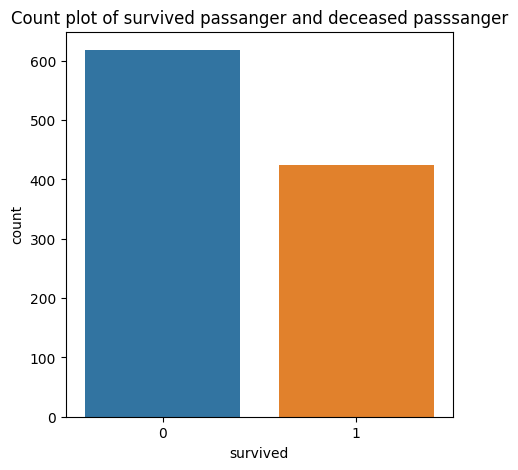

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'survived' , data = new_df)
plt.title('Count plot of survived passanger and deceased passsanger')

<Axes: xlabel='sex_male', ylabel='count'>

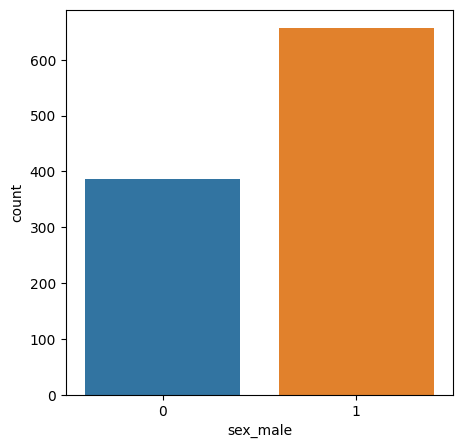

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex_female' and 'sex_male', data = new_df)